<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>

## Adquisicion y preprocesamiento de datos - RafaC

### Descripción variables ratio e intervalo
Vamos a analizar este tipo de variables

### Índice
[Centralidad](#Centralidad)<br>
[Dispersión](#Dispersión)<br>
[Histogramas](#Histogramas)<br>
[Asimetría](#Asimetría)<br>
[Curtosis](#Curtosis)<br>


<a name="Centralidad"></a>
## Centralidad

La idea es intentar reducir la variable completa a un solo valor, un "centro". Dos valores principales

* Media $\mu(x) = \frac{\displaystyle {\sum_{i=1}^{N} x_i}}{N}$, donde $x$ es la variable que estamos estudiando formada por $x_1, \dots, x_N$. La media es la medida de centralidad más popular. Puede verse afectada si hay hay una proporción grande de valores demasiado grandes o pequeños (outliers)

* Mediana: valor que deja al 50% de los valores por debajo y el otro 50% por encima



Ejemplo: notas obtenidas por diferentes países en las pruebas Pisa en lectura (REA), matemáticas (MAT) y ciencias (SCI) tanto para mujeres (FE) como para hombres (MA). Incluye también la renta per capita (RPC) del país y el nombre (PAIS) del país.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/PisaDataClean.csv"
df_pisa = pd.read_csv(url)
df_pisa.info() # información general, nulos, tipos y memoria que ocupa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPC     63 non-null     int64  
 1   PAIS    63 non-null     object 
 2   MAT     63 non-null     float64
 3   MAT_FE  63 non-null     float64
 4   MAT_MA  63 non-null     float64
 5   REA     63 non-null     float64
 6   REA_FE  63 non-null     float64
 7   REA_MA  63 non-null     float64
 8   SCI     63 non-null     float64
 9   SCI_FE  63 non-null     float64
 10  SCI_MA  63 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 5.5+ KB


In [2]:
# nos quedamos solo con los datos que sean números (asumimos que hemos comprobado que todos son ratio o intervalo)
df_pisa_num = df_pisa.select_dtypes(include=["number"])
desc_pisa = df_pisa_num.describe()
desc_pisa

RPC         MAT      MAT_FE      MAT_MA         REA  \
count      63.000000   63.000000   63.000000   63.000000   63.000000   
mean    38231.492063  458.878611  456.666206  461.112029  461.764438   
std     23866.666268   50.811613   49.576609   52.334665   46.212095   
min      5998.000000  327.702000  329.745931  325.586561  349.859300   
25%     21072.000000  417.588750  417.128338  418.260475  427.012750   
50%     33842.000000  476.830900  472.739508  477.767728  478.960600   
75%     49016.500000  494.870800  493.087239  499.616330  498.915150   
max    128702.000000  564.189700  564.254534  564.129003  535.100200   

           REA_FE      REA_MA         SCI      SCI_FE      SCI_MA  
count   63.000000   63.000000   63.000000   63.000000   63.000000  
mean   476.860812  446.760410  464.924883  465.160165  464.733040  
std     45.164406   48.360072   46.687935   45.151592   48.831863  
min    366.208167  335.185436  331.638800  330.828991  332.477015  
25%    442.215541  412.238123  426.357250  430.377770  423.049407  
50%    492.034800  460.103602  475.391200  472.586346  471.766923  
75%    510.021003  487.043469  501.686100  497.087670  505.496834  
max    550.511164  525.315266  555.574700  552.273031  558.663734

In [3]:
# Nos quedamos solo con media y mediana
desc_pisa.loc[["mean","50%"]]

RPC         MAT      MAT_FE      MAT_MA         REA  \
mean  38231.492063  458.878611  456.666206  461.112029  461.764438   
50%   33842.000000  476.830900  472.739508  477.767728  478.960600   

          REA_FE      REA_MA         SCI      SCI_FE      SCI_MA  
mean  476.860812  446.760410  464.924883  465.160165  464.733040  
50%   492.034800  460.103602  475.391200  472.586346  471.766923

In [4]:
# otra forma, solo para una variable
df_pisa.MAT.mean(), df_pisa.MAT.median()

(458.8786111111111, 476.8309)

<a name="Dispersión"></a>
## Dispersión

Si las medidas de centralidad dan la idea de un "centro" de la variable, la media de dispersión sería el "radio" indica lo alejados que están de ese centro. Vamos a ver 2 cada uno relacionado con una de las medidas de centralidad

* Desviación típica $\sigma(x)=\sqrt{\frac{{\displaystyle \sum_{i=1}^{N}\left(x_{i}-\mu\right)^{2}}}{N}}$, la raíz cuadrada de la varianza

* Desviación absoluta con respecto a la mediana $\mathit{MAD}(x) = mediana(|x_i - mediana(x)|)$

In [5]:
df_pisa.MAT.std(), (df_pisa.MAT - df_pisa.MAT.median()).abs().median()

(50.81161280035877, 34.24600000000004)

In [6]:
datos = []
for c in df_pisa_num.columns:
    variable = df_pisa[c]
    datos.append([variable.mean(), variable.median(), variable.std(), (variable-variable.median()).abs().median()])
    
estad = pd.DataFrame(datos,columns=["mean","median","std","MAD"],index=df_pisa_num.columns)    
estad

mean        median           std           MAD
RPC     38231.492063  33842.000000  23866.666268  14416.000000
MAT       458.878611    476.830900     50.811613     34.246000
MAT_FE    456.666206    472.739508     49.576609     33.205437
MAT_MA    461.112029    477.767728     52.334665     36.234844
REA       461.764438    478.960600     46.212095     34.230600
REA_FE    476.860812    492.034800     45.164406     33.485054
REA_MA    446.760410    460.103602     48.360072     35.806712
SCI       464.924883    475.391200     46.687935     33.830300
SCI_FE    465.160165    472.586346     45.151592     32.968941
SCI_MA    464.733040    471.766923     48.831863     37.823431

Algunas consecuencias sencillas:
* De media parece que los hombres lo hacen mejor en matemáticas y las mujeres en lectura, en ciencia la diferencia es muy pequeña
* De media se obtiene mejor nota en ciencias que en lectura, y en lectura que en matemáticas
* En general la mediana es mayor que la media indicando una mayor dispersión a la izquierda
* La mayor dispersión `std` se da en MAT_MA, pero si nos fijamos en la mediana es SCI_MA (quizás MAT_MA tiene más outliers?)
* La menor dispersión `std` se da en REA_FE y en SCI_FE, aunque desde el punto de vista de MAD se da en SCI_FE y MAT_FE. En todo caso parece que las notas para las chicas varían menos de país en país que en el caso de los chicos (¿por qué?)

<a name="Histogramas"></a>
## Histogramas

* No debe confundirse con diagrama de barras, donde se representan datos categóricos nominal

* Un histograma representa la frecuencia (número de elementos) en una variable (ratio u intervalo) representada por intervalos, nos permite ver la distribución de la variable (algo que no se pretende con el diagrama de barras) 

* En el caso de valores ordinales se puede usar un "diagrama de barras ordenado"

Ejemplo

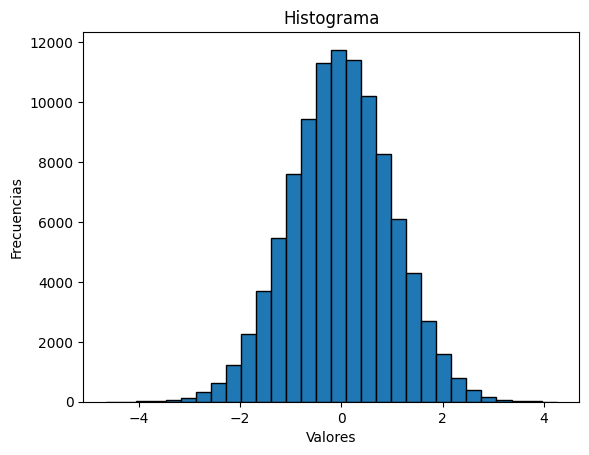

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

#generate a random numpy array with 1000 elements
normaldata = np.random.randn(100000)
data=normaldata

#histograma
plt.hist(data,edgecolor="black", bins =30)

#añadimos título
plt.title("Histograma")

#etiqueta en X
plt.xlabel("Valores")

#etiqueta en y
plt.ylabel("Frecuencias")

# mostrarlo
plt.show()

In [8]:
data.mean(), data.std(), np.median(data)

(-0.00027038546377990266, 0.999876468718308, -0.0022616727267600915)

Con `density=True` conseguimos frecuencias relativas

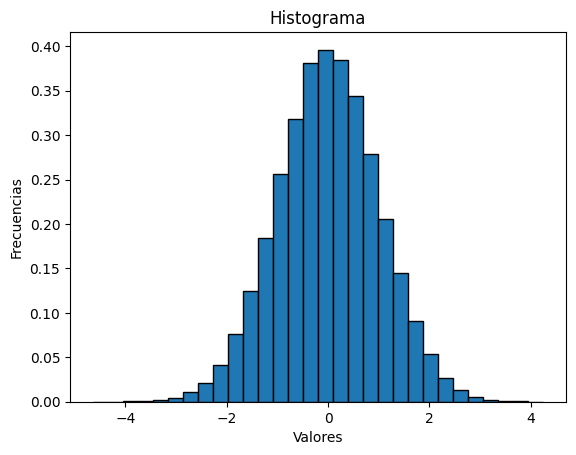

In [9]:
#histograma
plt.hist(data,edgecolor="black", bins =30, density=True)

#añadimos título
plt.title("Histograma")

#etiqueta en X
plt.xlabel("Valores")

#etiqueta en y
plt.ylabel("Frecuencias")

# mostrarlo
plt.show()

Cuando tenemos una normal "perfecta"  se tiene que 
<img src="https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs" width=400></img>

13.6 + 34.1 + 13.6 + 34.1 = 95.4% es decir casi el 95% de los valores estarán entre la media y +- 2 la desviación típica

In [10]:
m = data.mean()
s = data.std()

sum((data < m+2*s) & (data >m-2*s))/len(data)

0.95478

<a name="Asimetría"></a>
## Asimetría

Asimetría a la derecha: muchos datos acumulados en poco espacio a la izquierda, a la derecha un descenso lento y prolongado

* Se tendrá que media>mediana
* Normalmente solo tendremos que preocuparnos por outliers a la derecha, es decir por valores "excesivamente grandes"
* Sucede por ejemplo en mediciones que por su naturaleza son todas positivas
* Puede tener sentido hacer un estudio diferente a la izquierda y a la derecha de la mediana

In [11]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/madrid/contaminacionLargo.csv"
df_conta = pd.read_csv(url)
df_conta

ANO  MES   DIA  HORA   CO     NO    NO2  PM2.5  PM10  NOx    O3  \
0      2019.0  1.0   1.0   1.0  0.6   81.0   73.0    NaN   NaN  196  3.08   
1      2019.0  1.0   1.0   2.0  0.8  124.0   82.0    NaN   NaN  272  3.05   
2      2019.0  1.0   1.0   3.0  0.7   93.0   72.0    NaN   NaN  215  3.13   
3      2019.0  1.0   1.0   4.0  0.6   86.0   66.0    NaN   NaN  198  3.02   
4      2019.0  1.0   1.0   5.0  0.6   79.0   64.0    NaN   NaN  185  2.98   
...       ...  ...   ...   ...  ...    ...    ...    ...   ...  ...   ...   
24021  2021.0  9.0  30.0  20.0  0.3   27.0   80.0   17.0  23.0  122   NaN   
24022  2021.0  9.0  30.0  21.0  1.1  168.0  153.0   19.0  30.0  411   NaN   
24023  2021.0  9.0  30.0  22.0  1.0  179.0  157.0   28.0  44.0  431   NaN   
24024  2021.0  9.0  30.0  23.0  0.8  115.0  133.0   27.0  43.0  309   NaN   
24025  2021.0  9.0  30.0  24.0  0.4   19.0  102.0   20.0  30.0  130   NaN   

                    fechaH                fecha    festivo  
0      2019-01-01 00:00:00  2019-01-01 00:00:00    festivo  
1      2019-01-01 01:00:00  2019-01-01 00:00:00    festivo  
2      2019-01-01 02:00:00  2019-01-01 00:00:00    festivo  
3      2019-01-01 03:00:00  2019-01-01 00:00:00    festivo  
4      2019-01-01 04:00:00  2019-01-01 00:00:00    festivo  
...                    ...                  ...        ...  
24021  2021-09-30 19:00:00  2021-09-30 00:00:00  laborable  
24022  2021-09-30 20:00:00  2021-09-30 00:00:00  laborable  
24023  2021-09-30 21:00:00  2021-09-30 00:00:00  laborable  
24024  2021-09-30 22:00:00  2021-09-30 00:00:00  laborable  
24025  2021-09-30 23:00:00  2021-09-30 00:00:00  laborable  

[24026 rows x 14 columns]

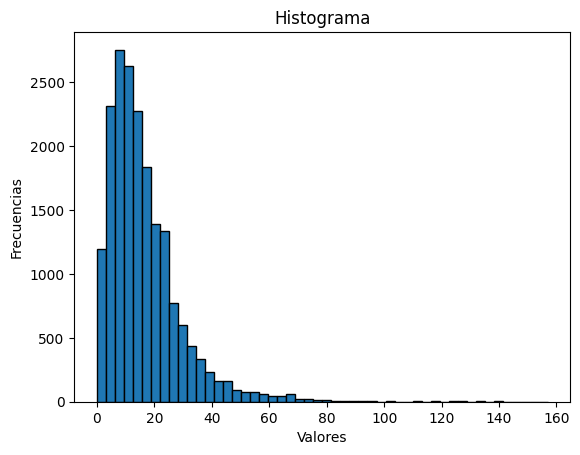

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

data = df_conta.PM10
#histograma
plt.hist(data,edgecolor="black", bins =50)

#añadimos título
plt.title("Histograma")

#etiqueta en X
plt.xlabel("Valores")

#etiqueta en y
plt.ylabel("Frecuencias")

# mostrarlo
plt.show()

In [13]:
data.mean(), data.median()

(16.39393460748697, 13.0)

Como vemos aquí no se cumple la regla anterior de que en el entorno 2std se concentra el 95% de la población. Esto es así porque no se trata de una normal

In [14]:
m = data.mean()
s = data.std()

sum((data < m+2*s) & (data >m-2*s))/len(data)

0.7571797219678681

La función `skew` de Pandas nos indica la asimetría:

        >0 : Asimetría a la derecha o positiva
        aprox. 0 : simétrico
        <0 : asimetría a la izquierda o negativa


<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png"  width=500>By Diva Jain - https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=84219892</img> 





In [15]:
data.skew()

2.404078728714794

Tenemos por tanto asimetría a la derecha. En el dataframe de PISA

In [16]:
for c in df_pisa_num:
    print(c,df_pisa_num[c].skew())

RPC 1.5781554179609465
MAT -0.47285423783957503
MAT_FE -0.47157882551534436
MAT_MA -0.47630612237478603
REA -0.5069435433836599
REA_FE -0.5589979678197334
REA_MA -0.4805101266718705
SCI -0.3967275143175904
SCI_FE -0.44800257199301036
SCI_MA -0.3735259919422978


En nuestros datos "normales"

In [17]:
pd.DataFrame({"x": normaldata}).skew()

x   -0.004883
dtype: float64

Como vemos no sale exactamente 0 aunque sí muy cercano

<a name="Apuntamiento"></a>
## Curtosis

La curtosis indica el peso de las colas en relación con una normar estándar. A menudo se confunde con "apuntamiento" pero no es exactamente lo mismo. La función `kurtosis` de Pandas nos indica este valor:

        >0 : leptocúrtica ; los outliers tienen más peso que en la normal, tenemos muchos outliers (hay que ver por qué y si merece la pena hacer un estudio solo de esta parte)
        aprox. 0 : ismilar a una normal
        <0 : los outliers tienen menos peso que en la normal, la distribución está más concentrada alrededor de la media



In [18]:
pd.DataFrame({"x": normaldata}).kurtosis()

x   -0.011918
dtype: float64

In [19]:
df_conta.PM10.kurtosis()

10.844336984429532

In [20]:
df_pisa.MAT.kurtosis()

-0.6022147440965746

## Ejemplo

Datos de 7 sensores de radiación solar durante varios días con todas sus horas 

In [21]:
import pandas as pd
url = "https://github.com/RafaelCaballero/tdm/raw/master/datos/solar.zip"
df_solar = pd.read_csv(url)

In [22]:
df_solar

ID  DIA   HORA  TIMESTAMP        S1        S2        S3  \
0          335-9    1   9.00        335  0.681559  0.689707  0.529802   
1       335-9.02    1   9.02        335  0.741684  0.760434  0.627215   
2       335-9.03    1   9.03        335  0.722616  0.699479  0.691650   
3       335-9.05    1   9.05        335  0.724668  0.744789  0.721171   
4       335-9.07    1   9.07        335  0.696729  0.680453  0.699055   
...          ...  ...    ...        ...       ...       ...       ...   
13015  365-15.92   31  15.92        365  0.880301  0.921515  0.880301   
13016  365-15.93   31  15.93        365  0.876873  0.917506  0.876873   
13017  365-15.95   31  15.95        365  0.859016  0.884571  0.859016   
13018  365-15.97   31  15.97        365  0.853623  0.875976  0.853623   
13019  365-15.98   31  15.98        365  0.847129  0.888821  0.847129   

             S4        S5        S6        S7  
0      0.662423  0.759624  0.681559  0.614483  
1      0.747665  0.795755  0.741684  0.662882  
2      0.656747  0.794075  0.722616  0.740163  
3      0.680943  0.741052  0.724668  0.731887  
4      0.709132  0.744442  0.696729  0.652886  
...         ...       ...       ...       ...  
13015  0.823846  0.880301  0.880301  0.895543  
13016  0.822438  0.876873  0.876873  0.890674  
13017  0.800551  0.859016  0.859016  0.891926  
13018  0.810501  0.853623  0.853623  0.874393  
13019  0.795523  0.847129  0.847129  0.857044  

[13020 rows x 11 columns]

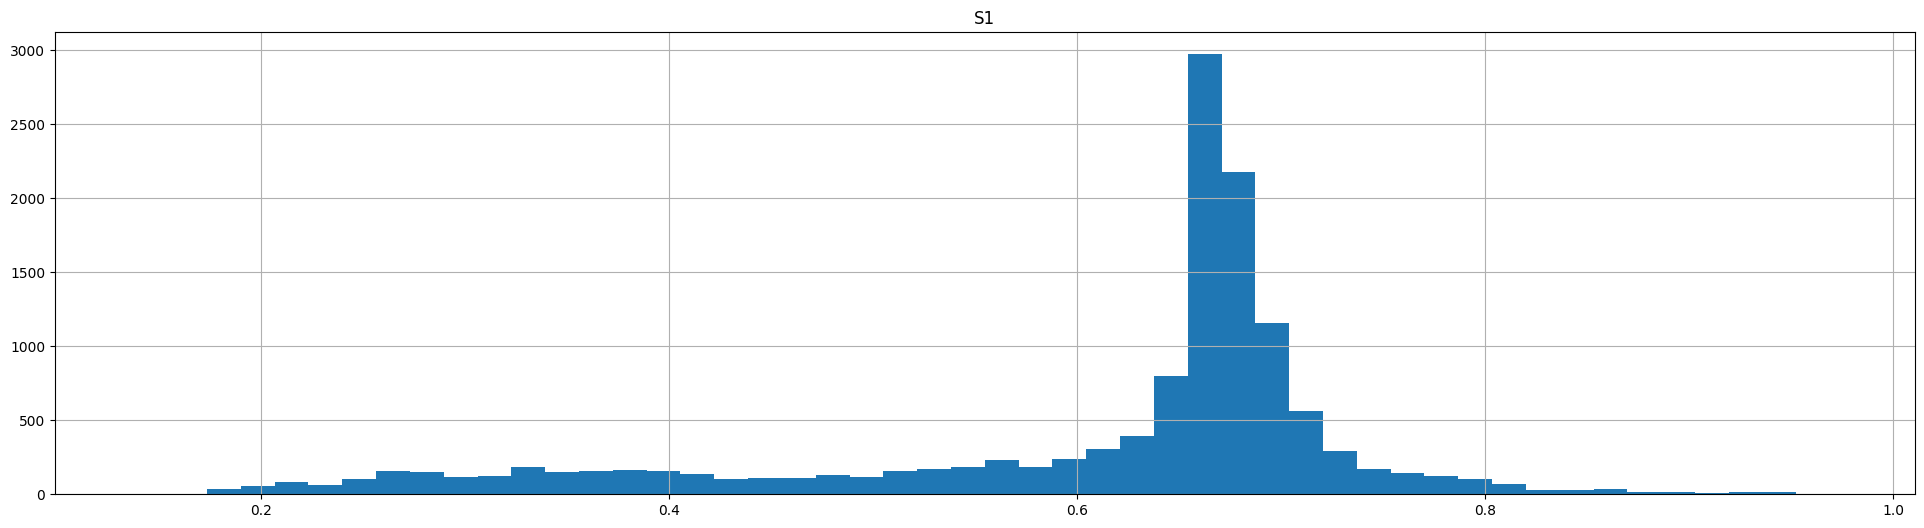

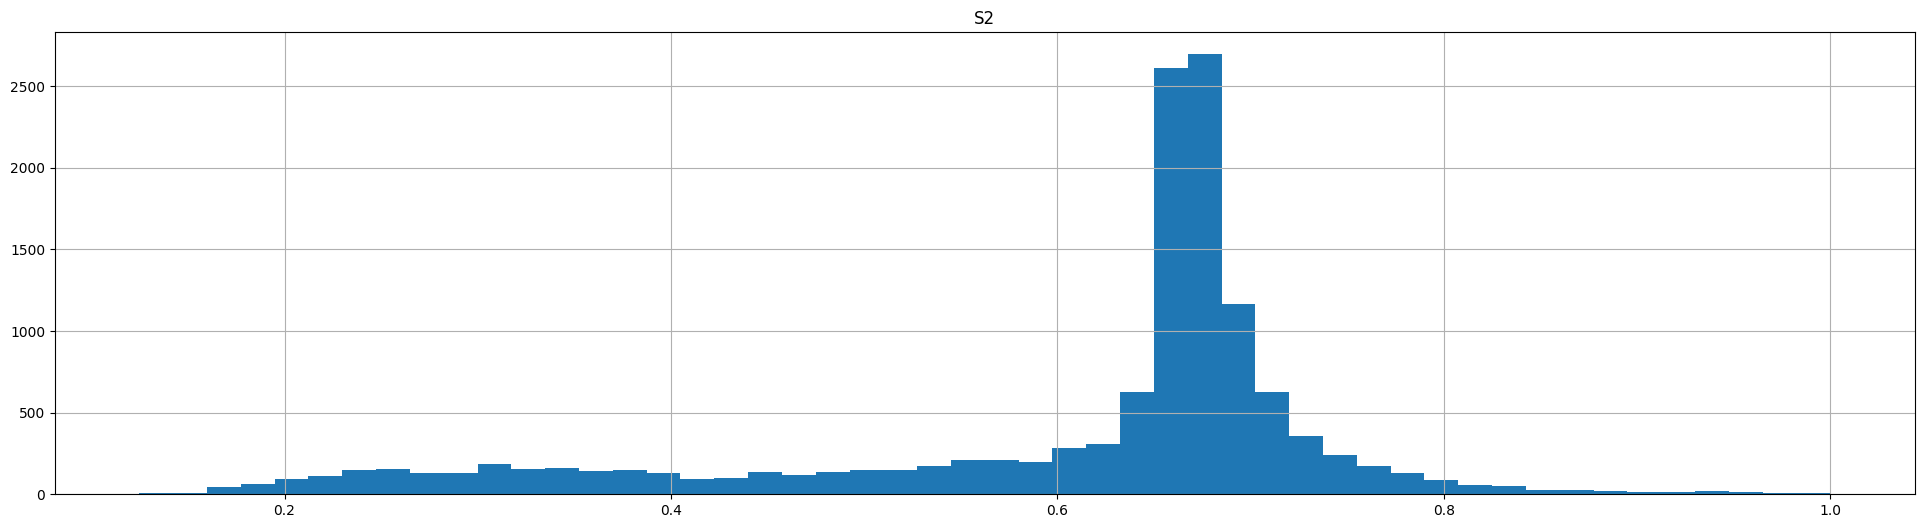

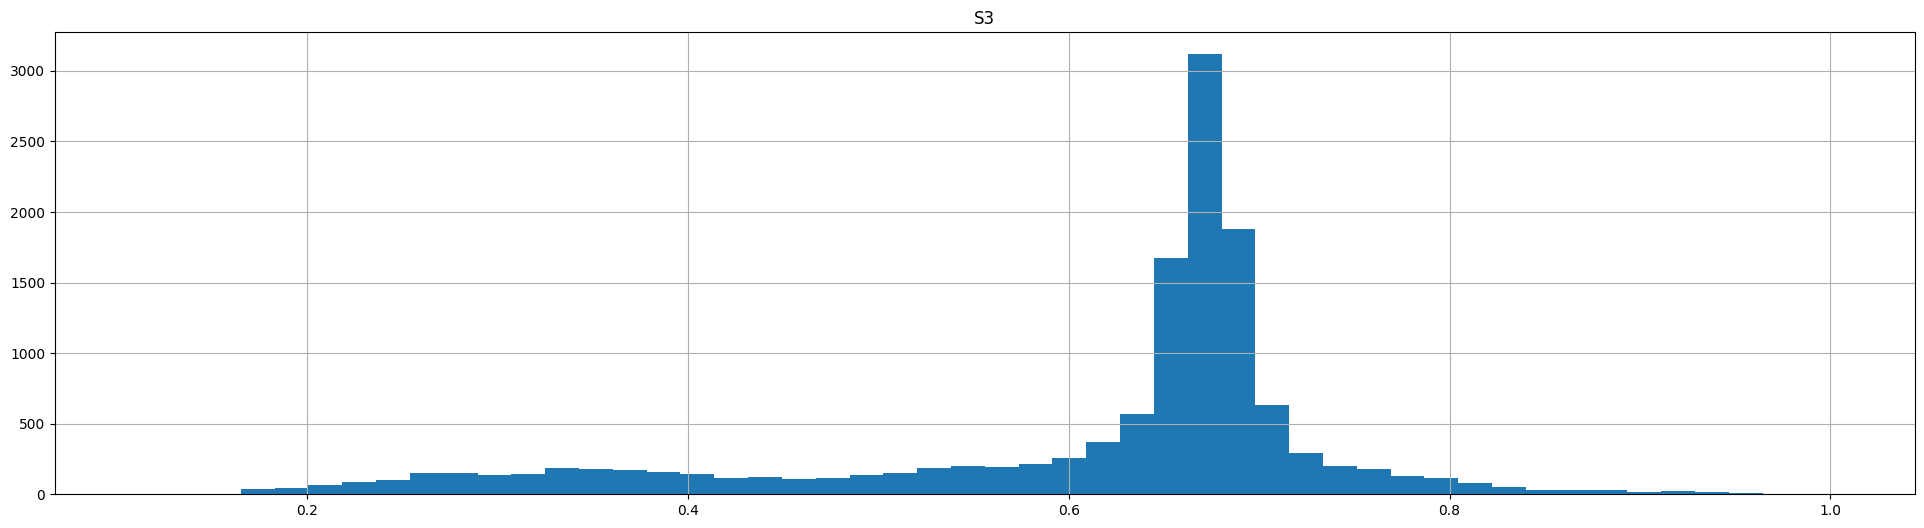

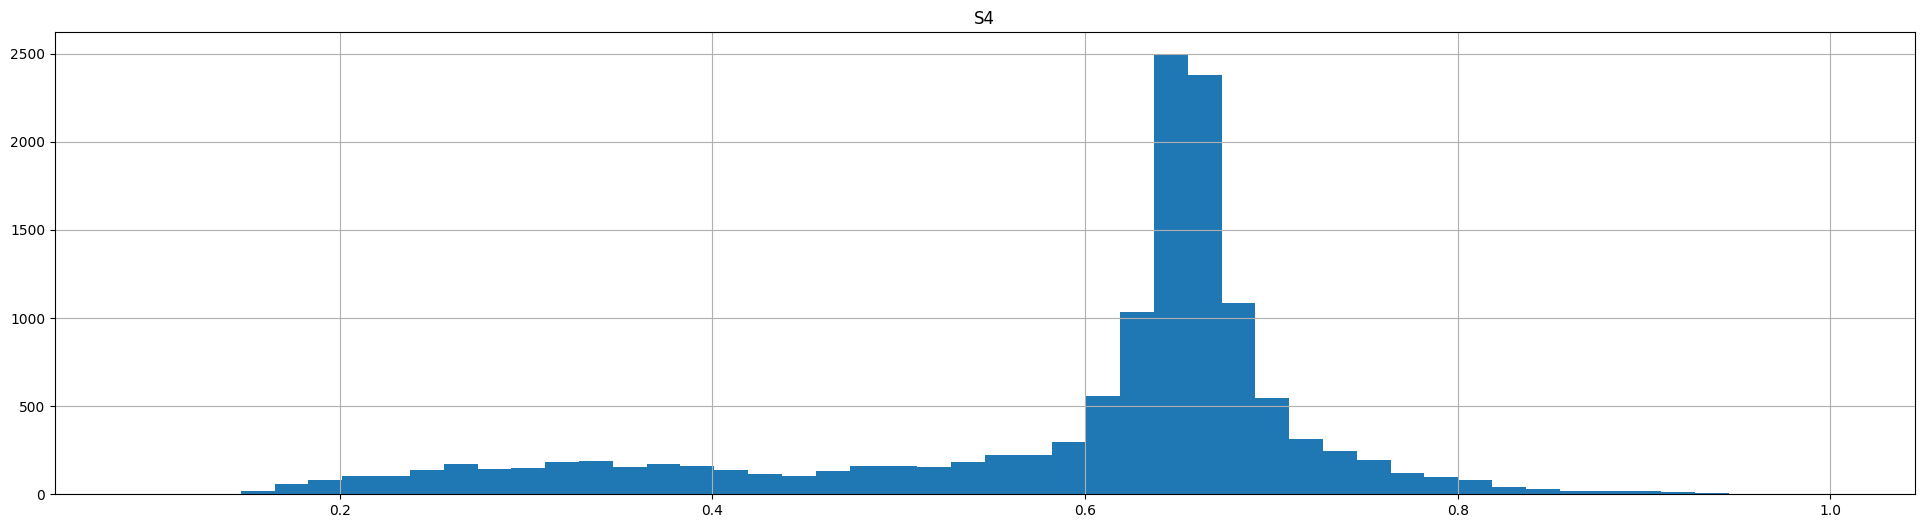

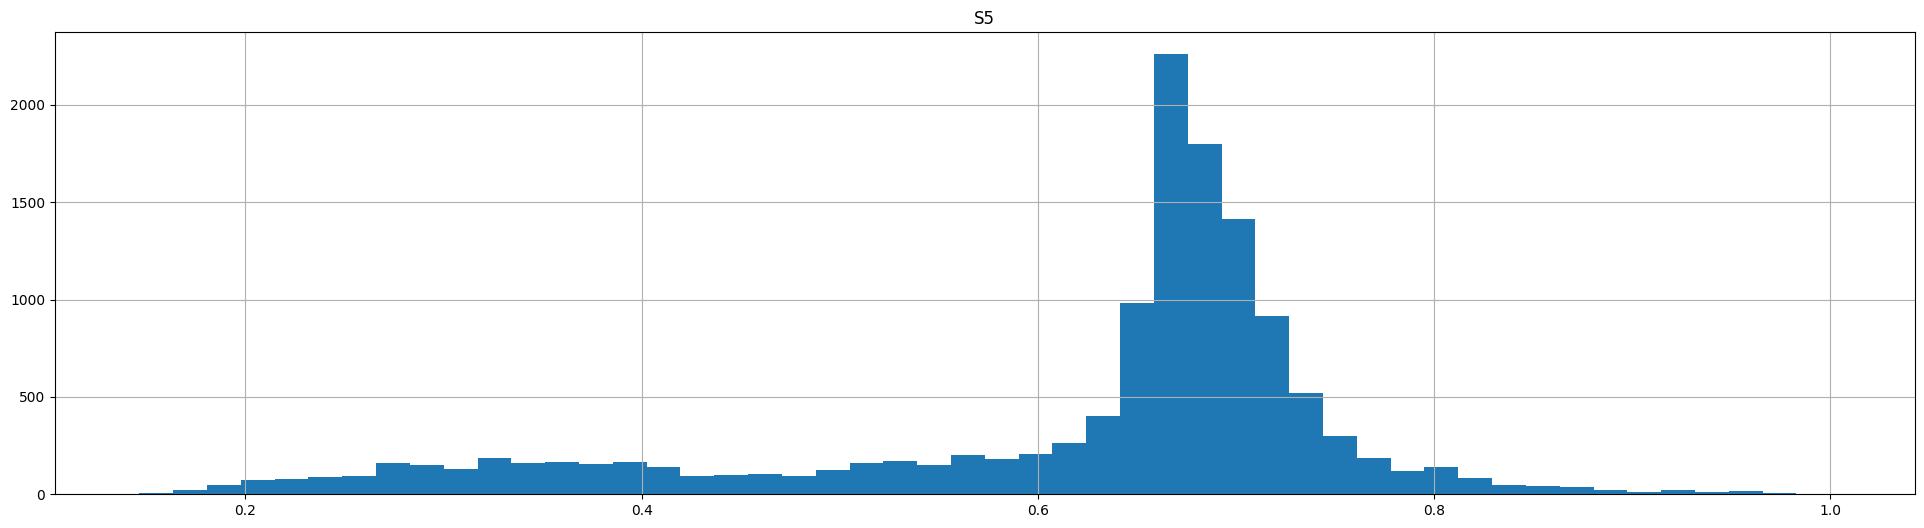

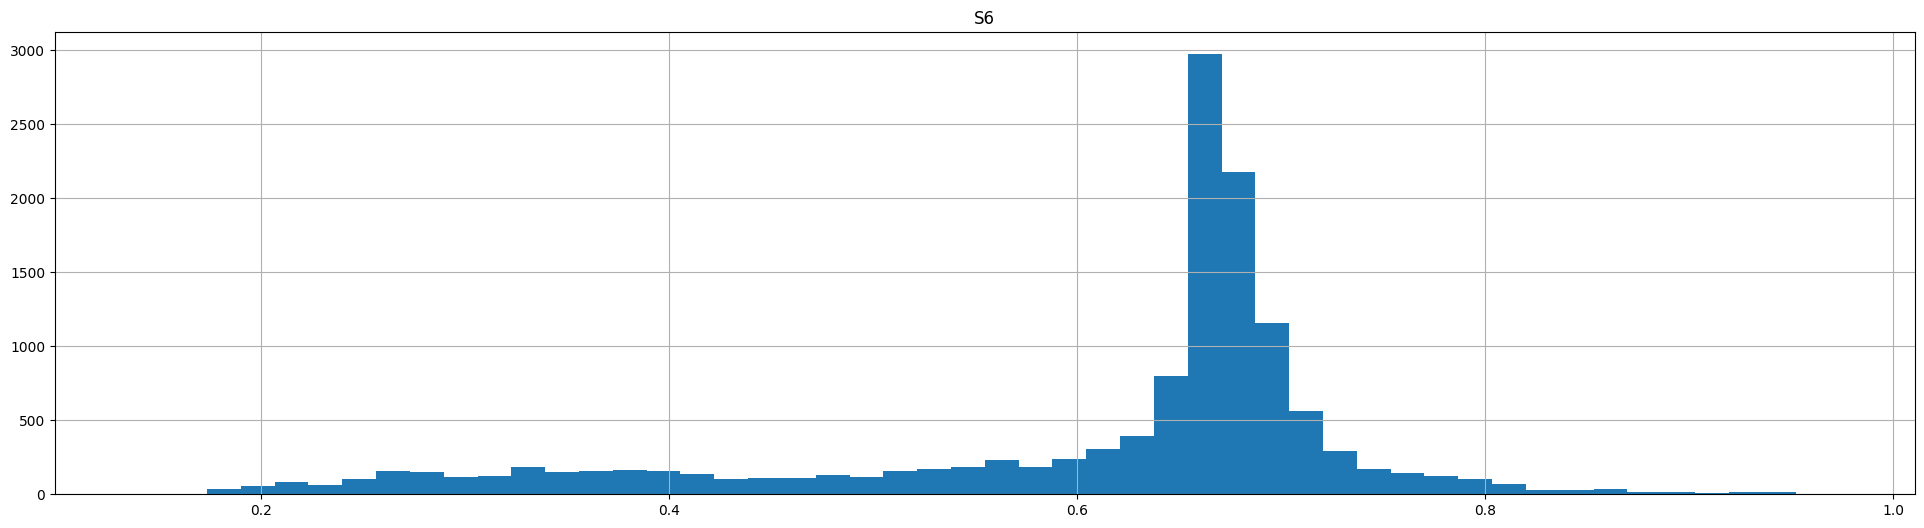

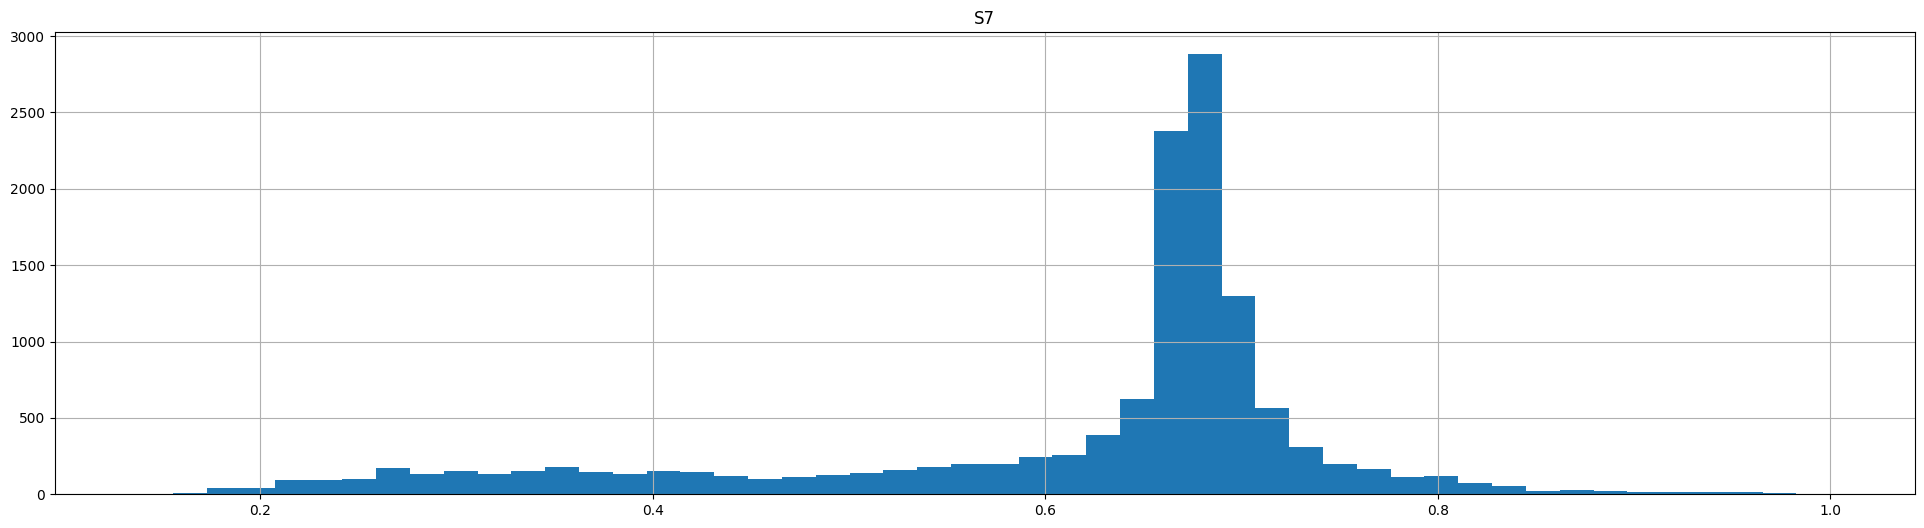

In [23]:

import matplotlib.pyplot as plt 
for c in df_solar.columns[4:]:
    fig, ax = plt.subplots(figsize=(24, 6))
    df_solar[c].hist(bins=50)
    plt.title(c)
    plt.show()

¿Qué consecuencias se extraen a simple vista? Añadir código para probar

<a name="Múltiples"></a>
## Múltiples histogramas

En ocasiones para comparar interesa reproducir varios histogramas en uno solo. Aunque se puede hacer esto con matplotlib la biblioteca seaborn ofrece un catálogo más amplio de posibilidades 

In [25]:
import seaborn as sns # !pip install seaborn

<AxesSubplot: xlabel='PM10', ylabel='Count'>

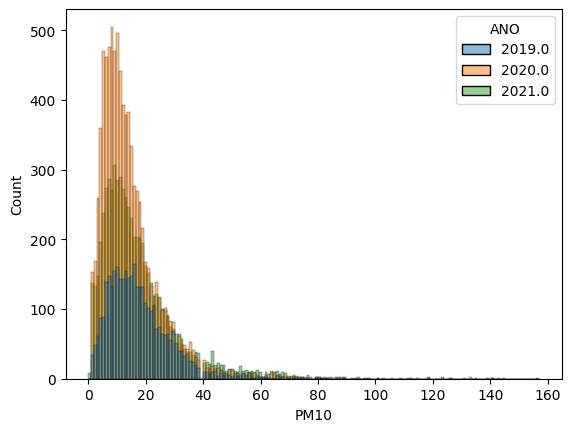

In [26]:

sns.histplot(data=df_conta, x="PM10", hue="ANO",palette='tab10')

a menudo se ve mejor si usamos la opción `multiple='stack'`

<AxesSubplot: xlabel='PM10', ylabel='Count'>

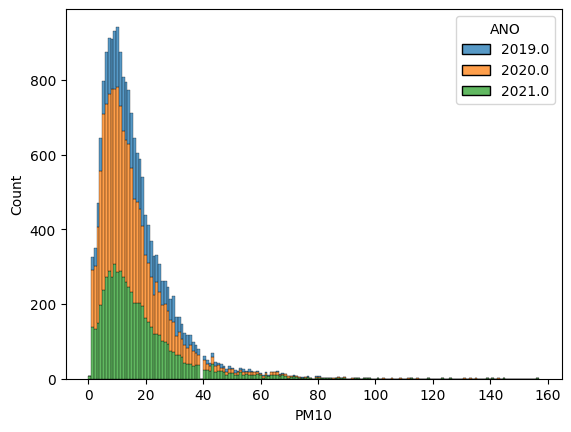

In [27]:
sns.histplot(data=df_conta, x="PM10", hue="ANO",palette='tab10', multiple="stack")

También se pueden comparar dos variables continuas, pero puede que haya que hacer una transformación

In [28]:
df_conta_largo =df_conta[["PM10","PM2.5"]].melt()
df_conta_largo

variable  value
0         PM10    NaN
1         PM10    NaN
2         PM10    NaN
3         PM10    NaN
4         PM10    NaN
...        ...    ...
48047    PM2.5   17.0
48048    PM2.5   19.0
48049    PM2.5   28.0
48050    PM2.5   27.0
48051    PM2.5   20.0

[48052 rows x 2 columns]

<AxesSubplot: xlabel='value', ylabel='Count'>

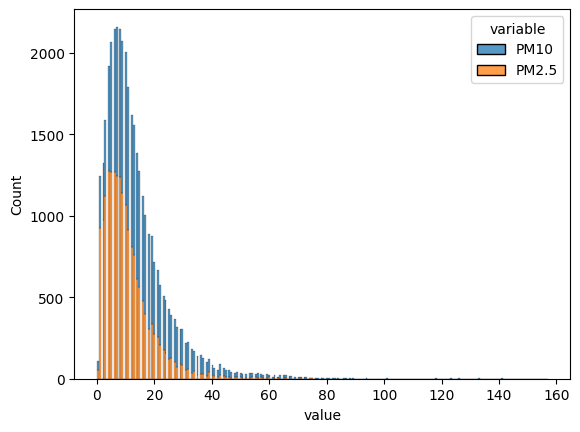

In [29]:
sns.histplot(data=df_conta_largo, x="value", hue="variable",palette='tab10', multiple="stack")

Incluso 2 variables continuas 

<AxesSubplot: xlabel='PM10', ylabel='PM2.5'>

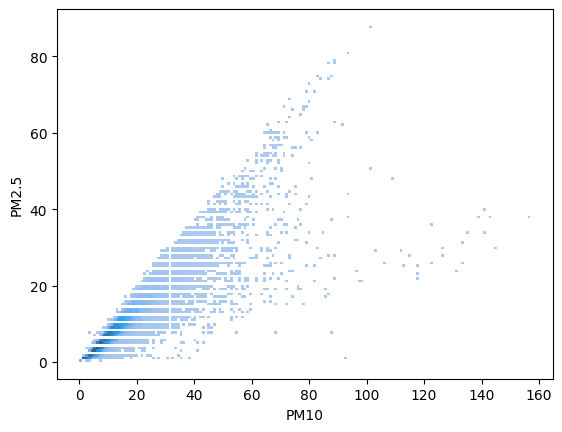

In [30]:
sns.histplot(data=df_conta, x="PM10", y="PM2.5")